In [1]:
# whole standard Data Science library
import pandas as pd
import numpy as np


# setting random seed to 7
np.random.seed(7)

#vizualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# selected functions from Data Science libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


#import project modules



import os


# libraries for convenience
pd.options.display.float_format = '{:,.3f}'.format

# turning off red warnings
import warnings
warnings.filterwarnings("ignore")

# module for fixing imported modules
from importlib import reload

In [2]:
def split_german_credit(df):
    #splits dataframe into two groups, group 1 and 2, 2 is the test group and will not be explored
    train_validate, test = train_test_split(df, test_size = 0.2)
    #splits group 1 further into two groups, train and validate
    train, validate = train_test_split(train_validate, test_size=0.3)
    
    return train, validate, test

In [24]:
def acquire_german_credit():

    df = pd.read_csv('data/german_credit_data.csv', index_col = 0)

    
    return df

In [93]:
def category_adjustments(df):

    df.columns = df.columns.str.lower()
    df['checking account'] = df['checking account'].replace({np.NAN:'none'})
    df['saving accounts'] = df['saving accounts'].replace({np.NAN:'none'})
    
    for col in df.columns:
        if (df[col].dtype == object):
            df[col] = df[col].astype('category')
    
    df['checking account'] = df['checking account'].cat.set_categories(['none','little', 'moderate', 'rich'], ordered = True)
    df['saving accounts'] = df['saving accounts'].cat.set_categories(
        ['none', 'little', 'moderate', 'rich', 'quite rich'], ordered = True)
    
    df['risk'] = df.risk.map({'good':1, 'bad':0})
    return df

In [45]:
def get_german_credit():
    df = acquire_german_credit()
    df = category_adjustments(df)
    train, validate, test = split_german_credit(df)
    
    return train, validate, test

In [94]:
train, validate, test = get_german_credit()

In [58]:
df = acquire_german_credit()
df = category_adjustments(df)

In [18]:
sns.set_palette('hsv_r')

In [56]:
train['saving accounts'].value_counts()

little        338
none          101
moderate       58
quite rich     36
rich           27
Name: saving accounts, dtype: int64

In [57]:
train['checking account'].value_counts()

none        224
moderate    156
little      146
rich         34
Name: checking account, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560 entries, 175 to 814
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               560 non-null    int64   
 1   sex               560 non-null    category
 2   job               560 non-null    int64   
 3   housing           560 non-null    category
 4   saving accounts   560 non-null    category
 5   checking account  560 non-null    category
 6   credit amount     560 non-null    int64   
 7   duration          560 non-null    int64   
 8   purpose           560 non-null    category
 9   risk              560 non-null    category
dtypes: category(6), int64(4)
memory usage: 26.3 KB


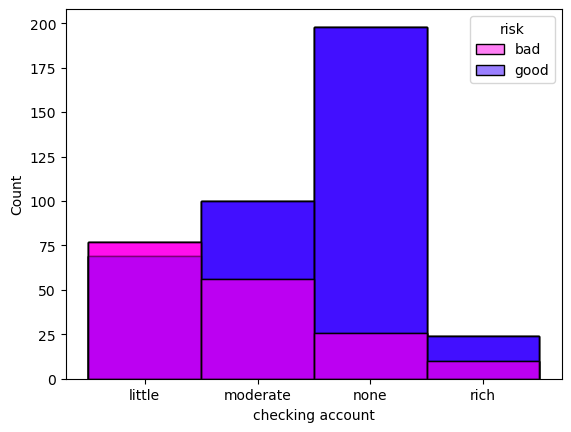

In [50]:
for i in checking:
     sns.histplot(data = train, x = 'checking account', hue = 'risk')

In [64]:
for col in train.columns:
    print(train[col].value_counts())
    

23    30
24    29
27    29
26    29
29    24
28    23
35    23
30    22
31    22
33    20
34    19
25    19
36    18
32    17
22    16
40    16
38    14
39    13
47    13
41    11
42    11
50    10
21     9
37     9
43     9
46     8
44     7
63     7
45     7
61     6
51     6
54     6
20     5
53     5
48     5
49     4
52     4
55     4
57     4
60     4
67     3
58     3
65     3
68     2
19     2
56     2
64     2
59     2
66     1
74     1
62     1
75     1
Name: age, dtype: int64
male      378
female    182
Name: sex, dtype: int64
2    367
1    104
3     79
0     10
Name: job, dtype: int64
own     397
rent    105
free     58
Name: housing, dtype: int64
little        338
none          101
moderate       58
quite rich     36
rich           27
Name: saving accounts, dtype: int64
none        224
moderate    156
little      146
rich         34
Name: checking account, dtype: int64
1199    2
2028    2
1413    2
1503    2
1275    2
       ..
6999    1
3499    1
3651    1
4020    1
3931 

In [74]:
def big_viz(df):
    plt.figure(figsize=(20,20))
    big_variables= ['age', 'credit amount', 'duration']
    small_variables= ['sex', 'job', 'housing', 'saving accounts', 'checking account']

    n =310
    for i in big_variables:
        n+=1 
        plt.subplot(n)
        sns.histplot(data = df, x=i, hue='risk', kde = True, bins= 50, palette='hsv_r')
    
    plt.show()
    
def small_viz(df):
    plt.figure(figsize=(20,20))
    big_variables= ['age', 'credit amount', 'duration']
    small_variables= ['sex', 'job', 'housing', 'saving accounts', 'checking account']
    
    n =320
    for i in small_variables:
        n+=1 
        plt.subplot(n)
        sns.histplot(data = df, x=i, hue='risk', kde= True, bins = 10, palette='hsv')    
    


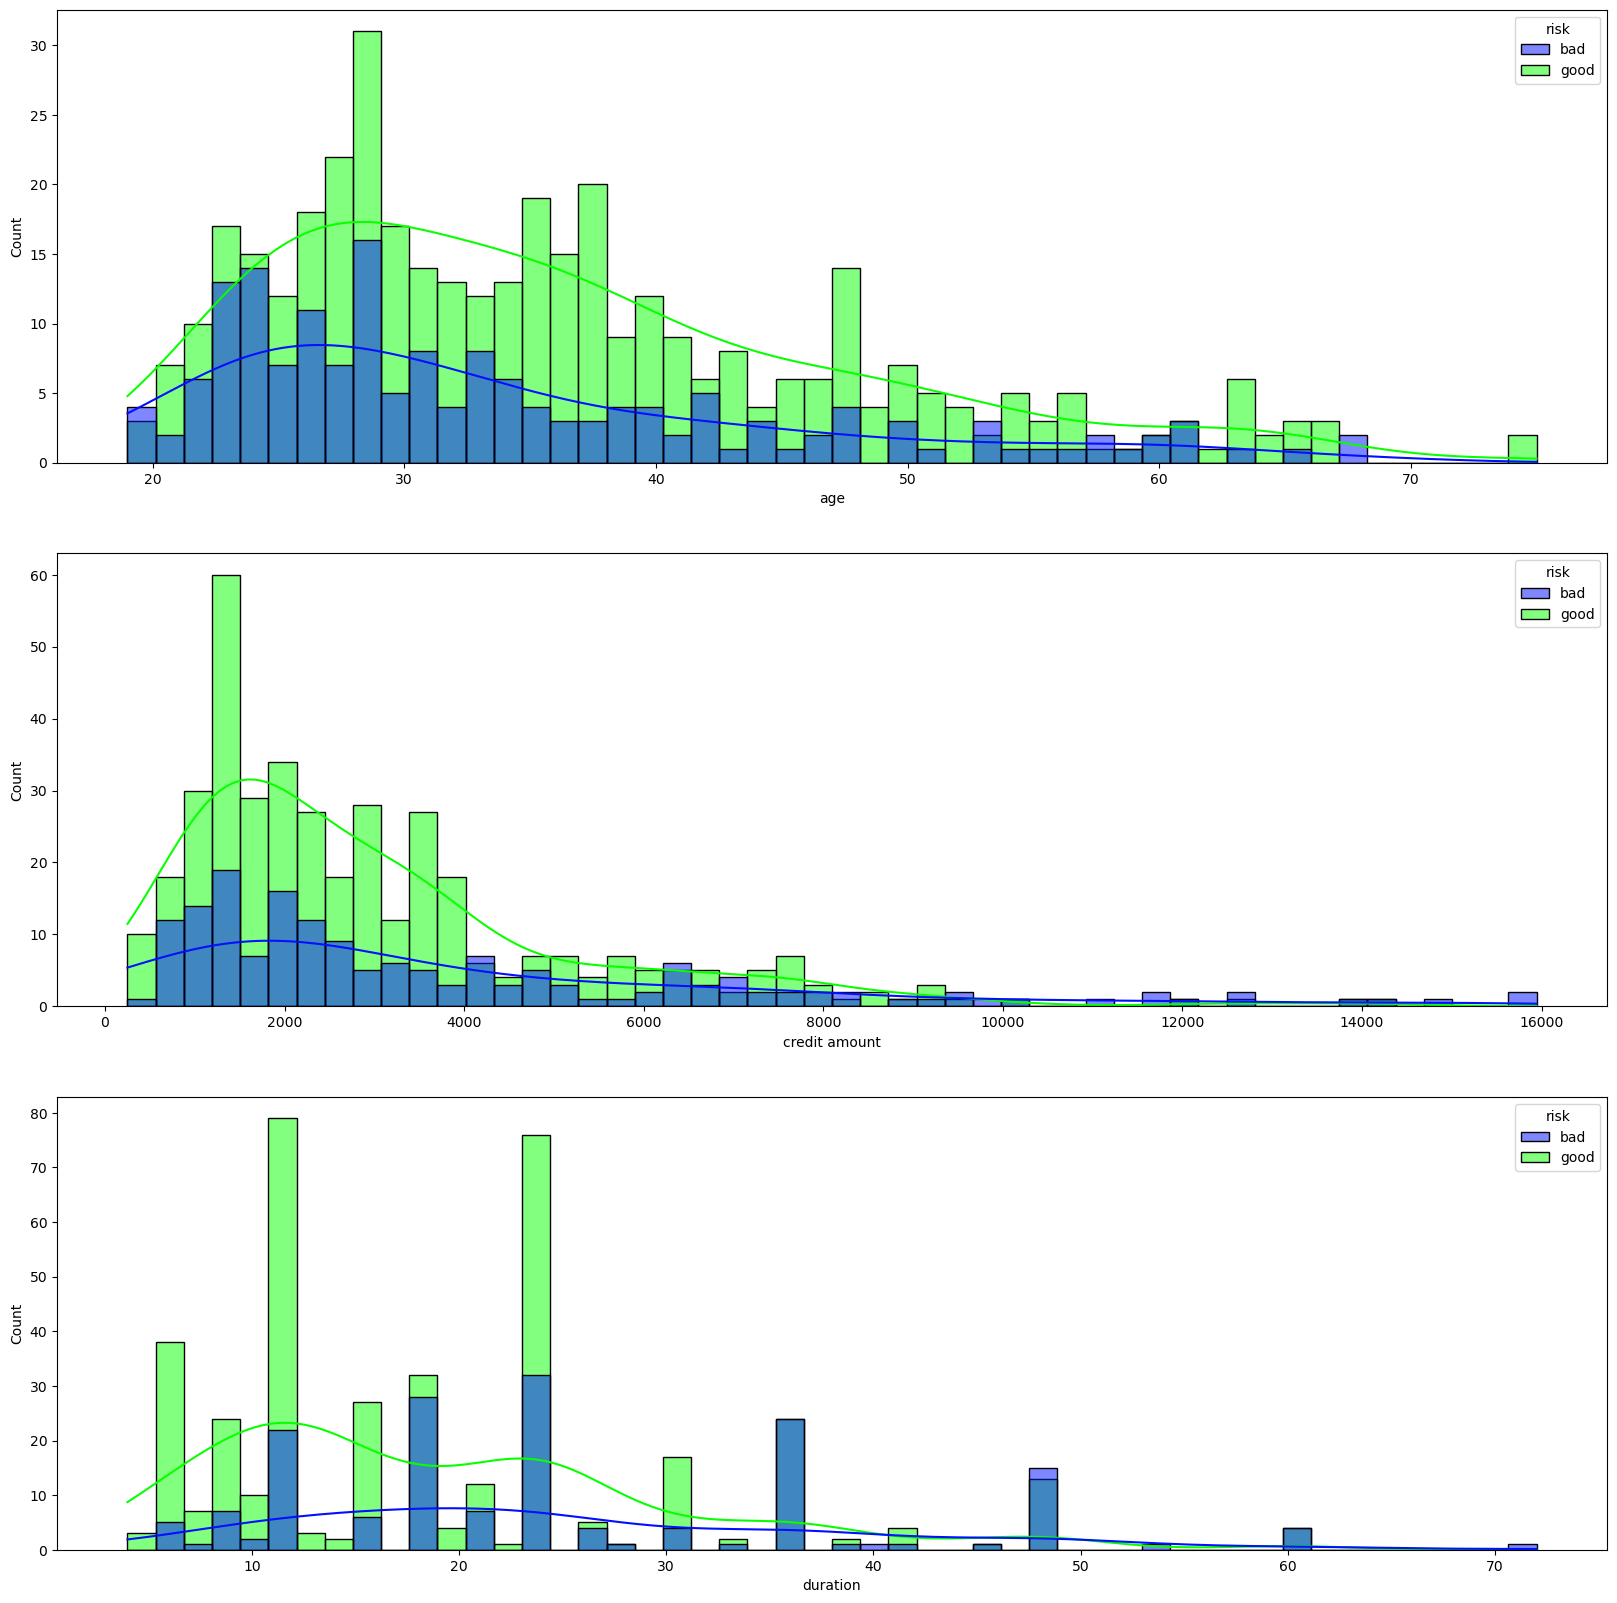

In [68]:
big_viz(train)

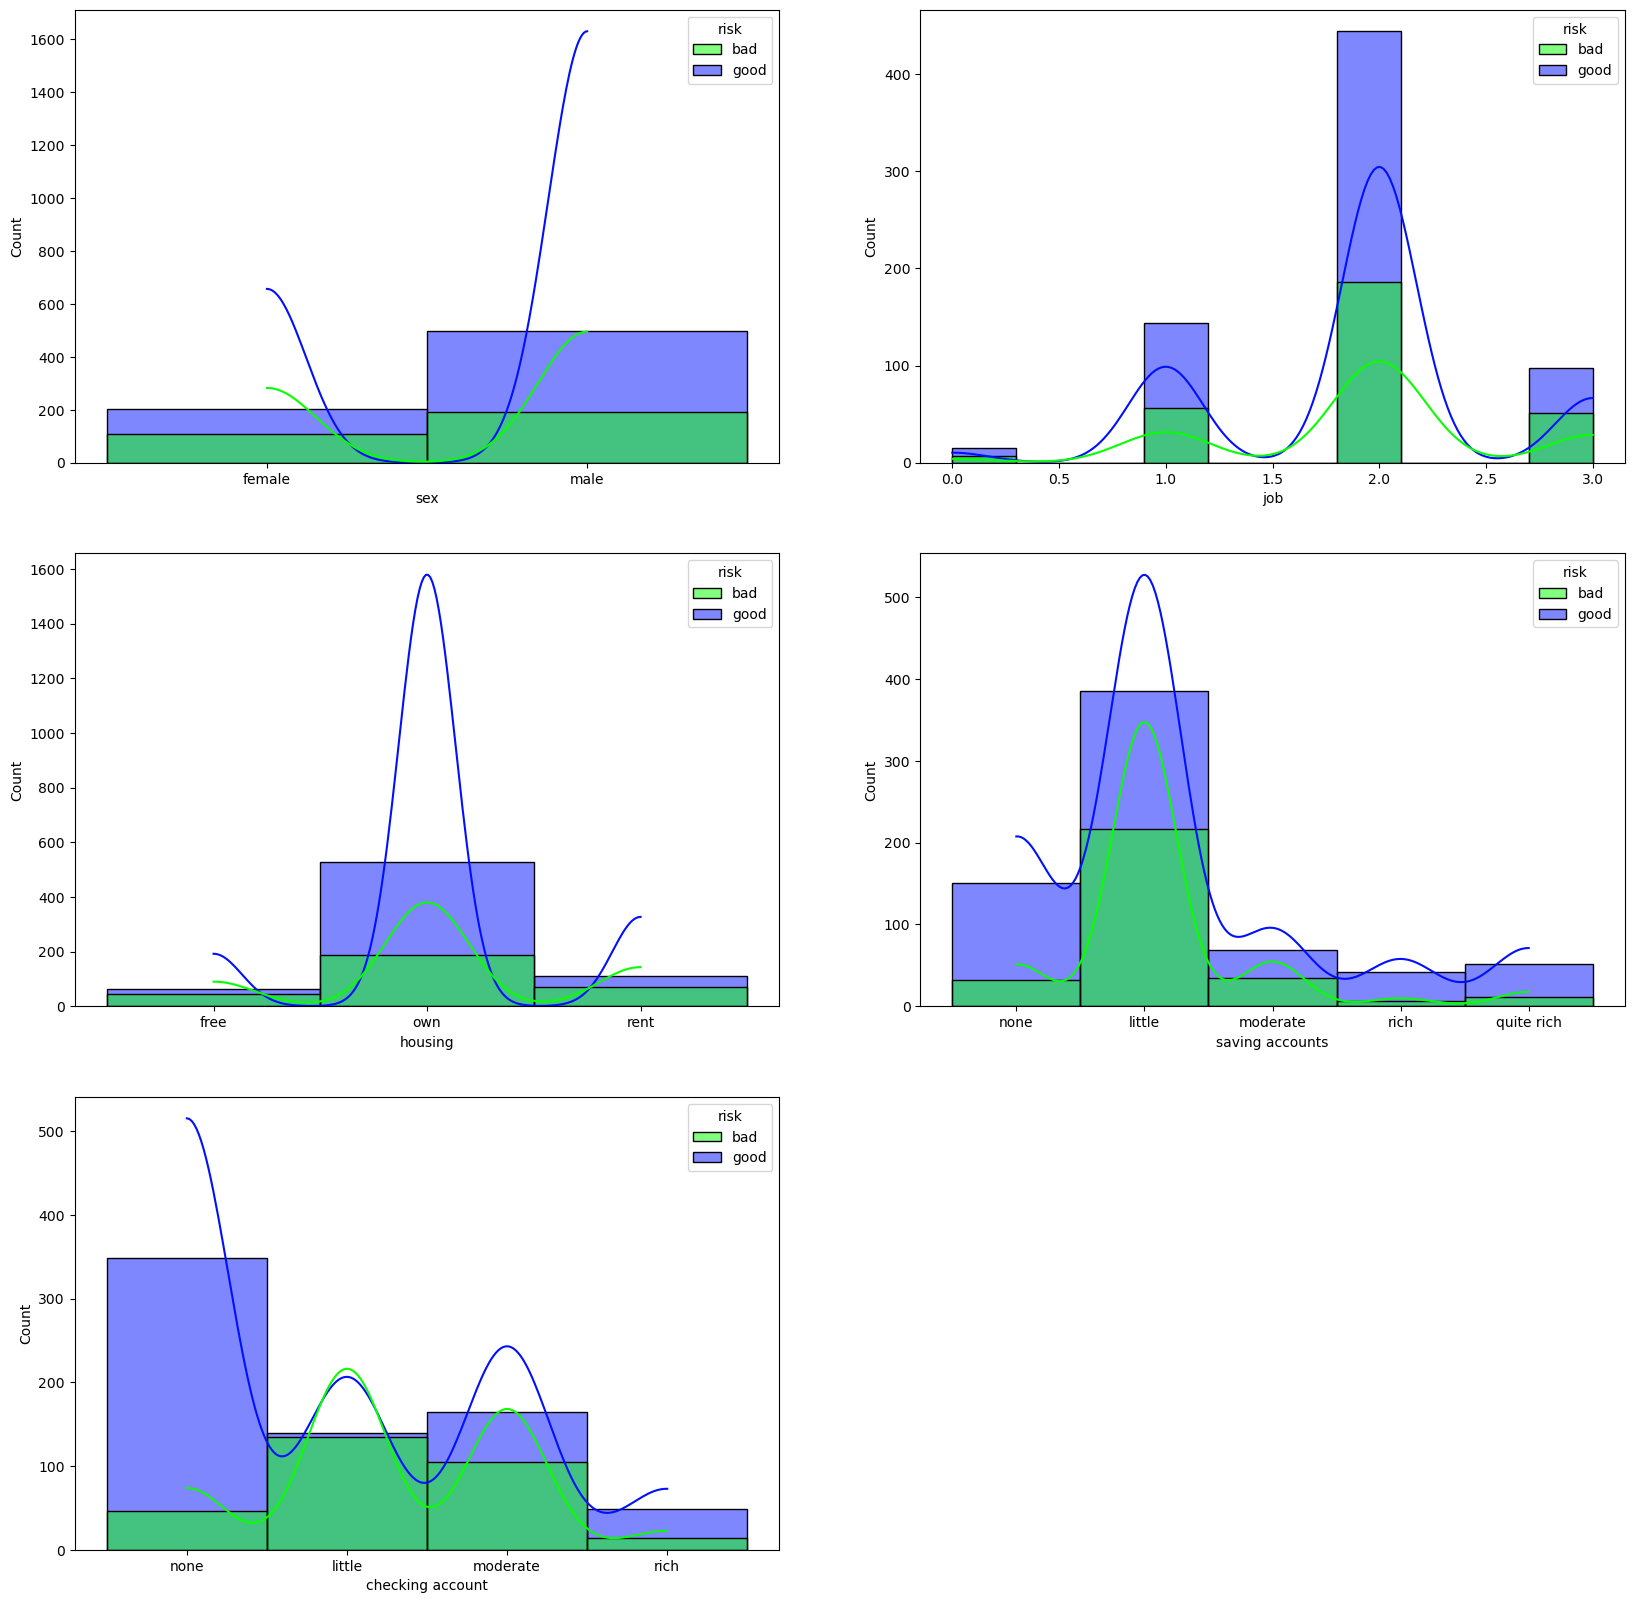

In [75]:
small_viz(df)

<AxesSubplot:xlabel='risk', ylabel='Count'>

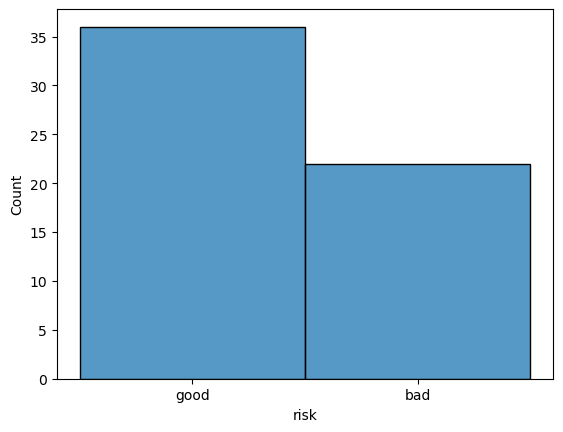

In [54]:
sns.histplot(data =train[train.housing == 'free'], x = 'risk')

In [120]:
train[train['checking account'] == 'nan']

,age,sex,job,housing,saving accounts,checking account,credit amount,duration,purpose,risk


In [121]:
train['checking account'] = train['checking account'].replace({np.NAN:'none'})

In [77]:
nan_bool = train['checking account'] == 'nan'

In [92]:
test_df

,age,sex,job,housing,saving accounts,checking account,credit amount,duration,purpose,risk
175,53,female,3,own,none,none,7485,30,car,0
781,60,male,2,own,rich,none,1940,24,car,1
827,36,male,2,own,little,none,4165,18,business,0
449,61,male,2,own,rich,moderate,1512,15,repairs,0
367,22,female,2,rent,little,little,3650,18,furniture/equipment,1
...,...,...,...,...,...,...,...,...,...,...
169,31,male,2,own,little,moderate,1935,24,business,0
445,41,female,1,rent,none,none,1244,9,education,1
817,24,female,2,rent,little,none,1554,6,radio/TV,1
231,51,male,1,free,quite rich,none,2507,9,car,1


In [119]:
train['checking account'].value_counts()

little      153
moderate    151
rich         36
Name: checking account, dtype: int64

In [86]:
little_bool = train['checking account'] == 'little'

In [107]:
train[train['checking account'] == 'little'].sum()

age                0.000
sex                0.000
job                0.000
housing            0.000
saving accounts    0.000
checking account   0.000
credit amount      0.000
duration           0.000
purpose            0.000
risk               0.000
dtype: float64

In [97]:
train[little_bool]

,age,sex,job,housing,saving accounts,checking account,credit amount,duration,purpose,risk


In [82]:
df['checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

<AxesSubplot:xlabel='risk', ylabel='Count'>

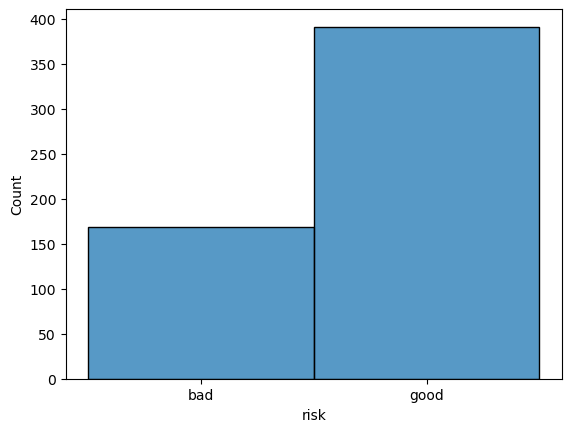

In [81]:
sns.histplot(data =train[train['checking account'] =='nan'], x = 'risk')

In [55]:
train[train == 'free'].count()

age                  0
sex                  0
job                  0
housing             58
saving accounts      0
checking account     0
credit amount        0
duration             0
purpose              0
risk                 0
dtype: int64

In [56]:
train.count()

age                 560
sex                 560
job                 560
housing             560
saving accounts     459
checking account    336
credit amount       560
duration            560
purpose             560
risk                560
dtype: int64

In [60]:
df['saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [65]:
checking_var = ['little', 'moderate', 'rich']

<AxesSubplot:xlabel='checking account', ylabel='Count'>

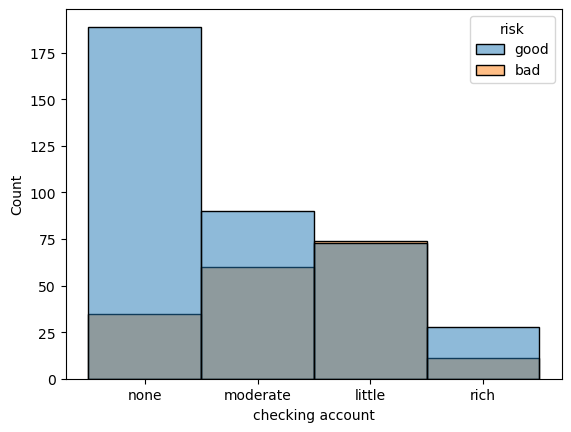

In [14]:
sns.histplot(data = train, x = 'checking account', hue = 'risk')

In [23]:
train.head()

,age,sex,job,housing,saving accounts,checking account,credit amount,duration,purpose,risk
688,35,male,2,own,moderate,none,2753,9,radio/TV,good
654,35,male,2,own,little,none,2346,24,car,good
32,30,male,2,own,moderate,moderate,5866,18,car,good
815,54,female,2,rent,little,moderate,7432,36,car,good
772,36,male,3,own,little,none,3275,21,car,good


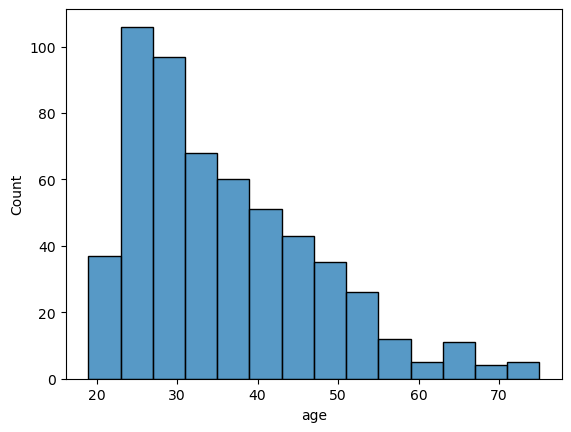

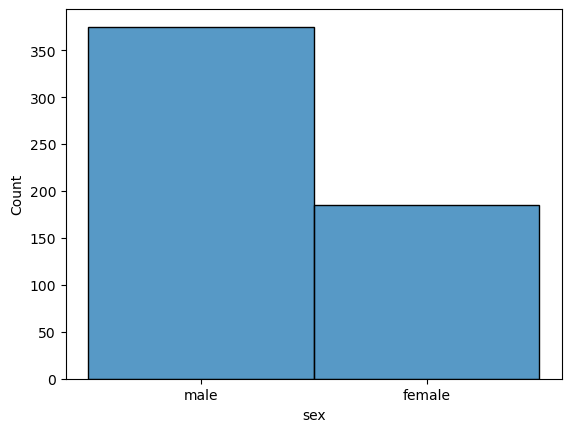

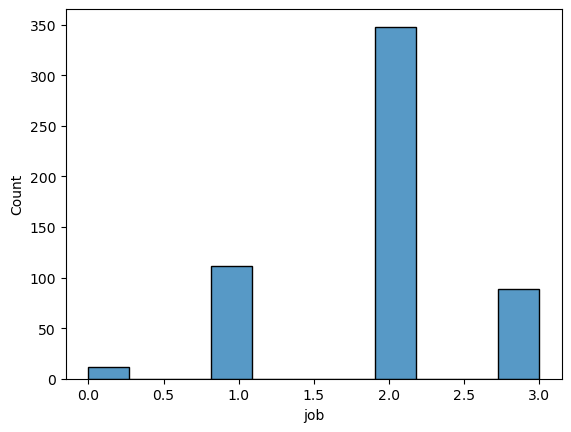

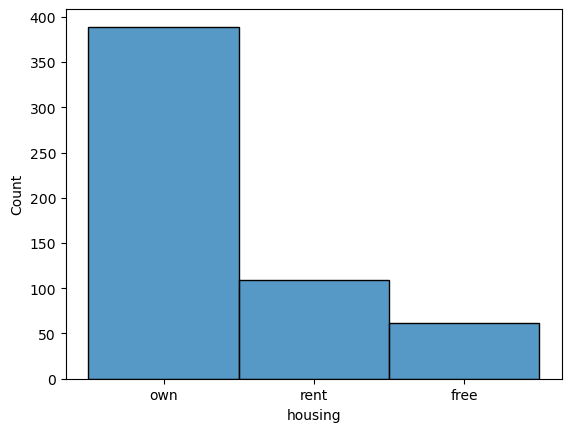

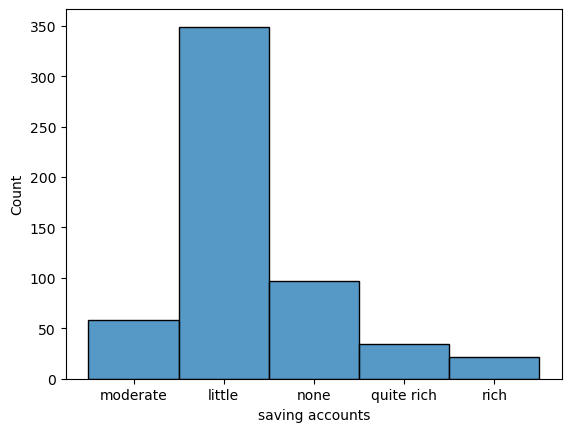

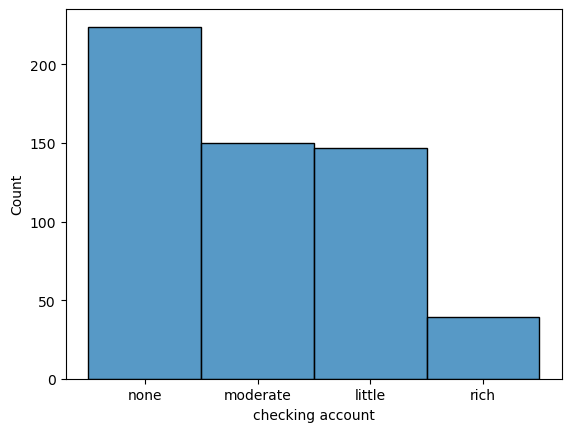

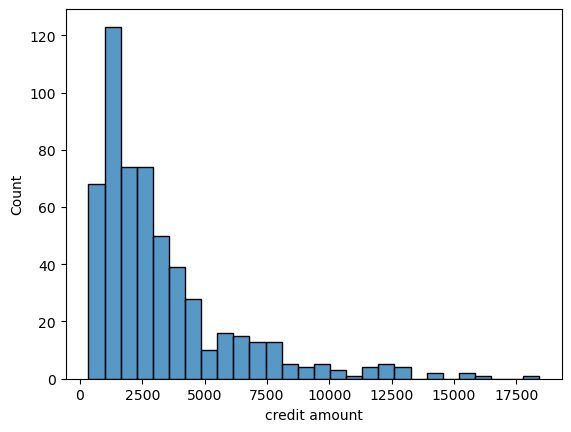

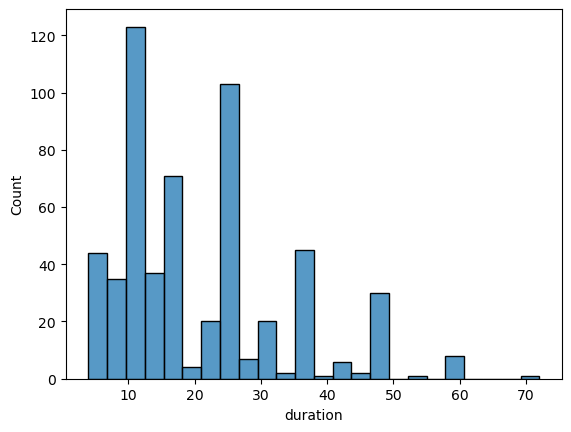

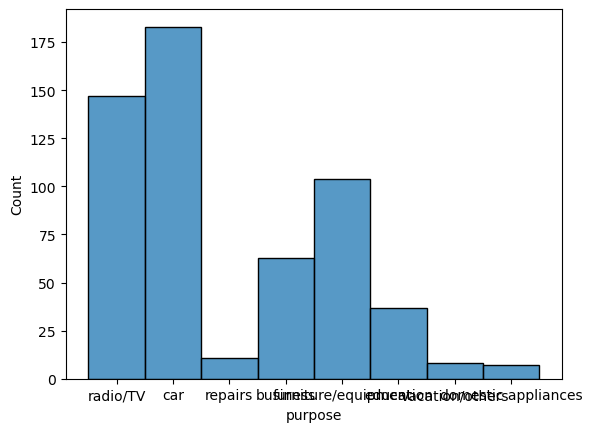

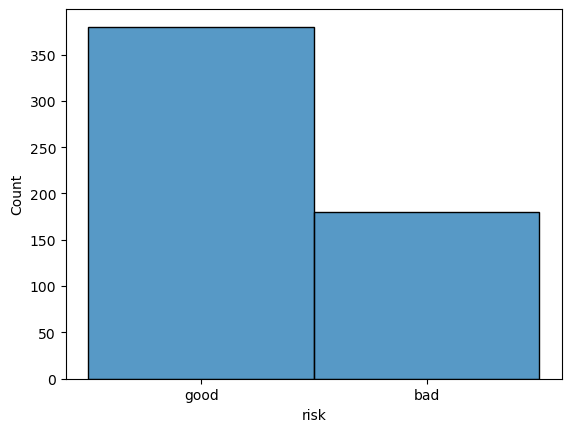

In [13]:
for col in train.columns:
    #n = 441
    sns.histplot(data = train, x = col)
    #plt.subplot(n)
    #n +=1
    plt.show()

In [76]:
import plotly.express as px

In [81]:
train.columns.to_list()

['age',
 'sex',
 'job',
 'housing',
 'saving accounts',
 'checking account',
 'credit amount',
 'duration',
 'purpose',
 'risk']

In [85]:
data = train
fig = px.sunburst(data_frame = train,
            path= ['age', 'saving accounts', 'credit amount'],
            values = 'risk')
            
fig.show()


ValueError: Column `risk` of `df` could not be converted to a numerical data type.

In [ ]:
'''
plotly.express.sunburst(data_frame=None, 
                        names=None, 
                        values=None, 
                        parents=None, 
                        title=None,)
fig = px.sunburst(df, names='country', values='pop', parents='continent', title='Population')
'''